In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy as sp
import plotly.plotly as py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:

import plotly.figure_factory as ff

In [49]:
data = pd.read_csv('data/Ph_tf_matrix_final.tsv', sep ='\t')

In [50]:
data = data.set_index('tf').T

In [51]:
data.head()

tf                                                     TEAD1       VDR  \
pv_14_Item_case_control_for_disordered_eating_b...  1.826225  1.803873   
pv_2_hour_glucose                                   0.688814  0.723512   
pv_2_hour_glucose_in_non_diabetics                  0.000000  0.000000   
pv_2_hour_insulin                                   0.553325  0.283751   
pv_2_hour_insulin_sensitivity_index                 0.000000  0.000000   

tf                                                      PRGR     HIF3A  \
pv_14_Item_case_control_for_disordered_eating_b...  0.794510  0.000000   
pv_2_hour_glucose                                   0.408288  0.216939   
pv_2_hour_glucose_in_non_diabetics                  0.000000  0.000000   
pv_2_hour_insulin                                   0.163408  0.000000   
pv_2_hour_insulin_sensitivity_index                 0.044943  0.000000   

tf                                                       ZFX     LHX2  \
pv_14_Item_case_control_for_disordered_eating_b...  0.000000  0.00000   
pv_2_hour_glucose                                   0.107684  1.03175   
pv_2_hour_glucose_in_non_diabetics                  0.000000  0.00000   
pv_2_hour_insulin                                   0.000000  0.00000   
pv_2_hour_insulin_sensitivity_index                 0.000000  0.00000   

tf                                                     LHX3      LHX4  \
pv_14_Item_case_control_for_disordered_eating_b...  0.00000  0.000000   
pv_2_hour_glucose                                   0.12608  0.609294   
pv_2_hour_glucose_in_non_diabetics                  0.00000  0.000000   
pv_2_hour_insulin                                   0.00000  0.000000   
pv_2_hour_insulin_sensitivity_index                 0.00000  0.000000   

tf                                                     STA5A     IRX2  ...  \
pv_14_Item_case_control_for_disordered_eating_b...  0.000000  0.00000  ...   
pv_2_hour_glucose                                   3.049783  0.09121  ...   
pv_2_hour_glucose_in_non_diabetics                  0.000000  0.00000  ...   
pv_2_hour_insulin                                   0.000000  0.00000  ...   
pv_2_hour_insulin_sensitivity_index                 0.000000  0.00000  ...   

tf                                                  ZBTB4  BATF3  HXB5  ZN165  \
pv_14_Item_case_control_for_disordered_eating_b...    0.0    0.0   0.0    0.0   
pv_2_hour_glucose                                     0.0    0.0   0.0    0.0   
pv_2_hour_glucose_in_non_diabetics                    0.0    0.0   0.0    0.0   
pv_2_hour_insulin                                     0.0    0.0   0.0    0.0   
pv_2_hour_insulin_sensitivity_index                   0.0    0.0   0.0    0.0   

tf                                                  MAFB  HXD4  IRX5  HXD13  \
pv_14_Item_case_control_for_disordered_eating_b...   0.0   0.0   0.0    0.0   
pv_2_hour_glucose                                    0.0   0.0   0.0    0.0   
pv_2_hour_glucose_in_non_diabetics                   0.0   0.0   0.0    0.0   
pv_2_hour_insulin                                    0.0   0.0   0.0    0.0   
pv_2_hour_insulin_sensitivity_index                  0.0   0.0   0.0    0.0   

tf                                                  PRDM4  THAP4  
pv_14_Item_case_control_for_disordered_eating_b...    0.0    0.0  
pv_2_hour_glucose                                     0.0    0.0  
pv_2_hour_glucose_in_non_diabetics                    0.0    0.0  
pv_2_hour_insulin                                     0.0    0.0  
pv_2_hour_insulin_sensitivity_index                   0.0    0.0  

[5 rows x 475 columns]

In [52]:

# нормируем данные, заполняем пустые строки нулями(если есть)
# def preprocessing (data):
#     return data.divide(  data.sum(axis=1)  ,axis=0)

In [54]:
class PCA_transformating ():
    def __init__(self,data, n_components = 5 ):
        self.pca = PCA(n_components = n_components)
        self.pca.fit(data)
        print('explained variance ratio:')
        print(self.pca.explained_variance_ratio_)  
    
        self.transformed_data = self.pca.transform(data)
  

In [55]:
PCA_transformating1 =PCA_transformating(data)

explained variance ratio:
[0.52569614 0.03791855 0.03034119 0.02484932 0.02041865]


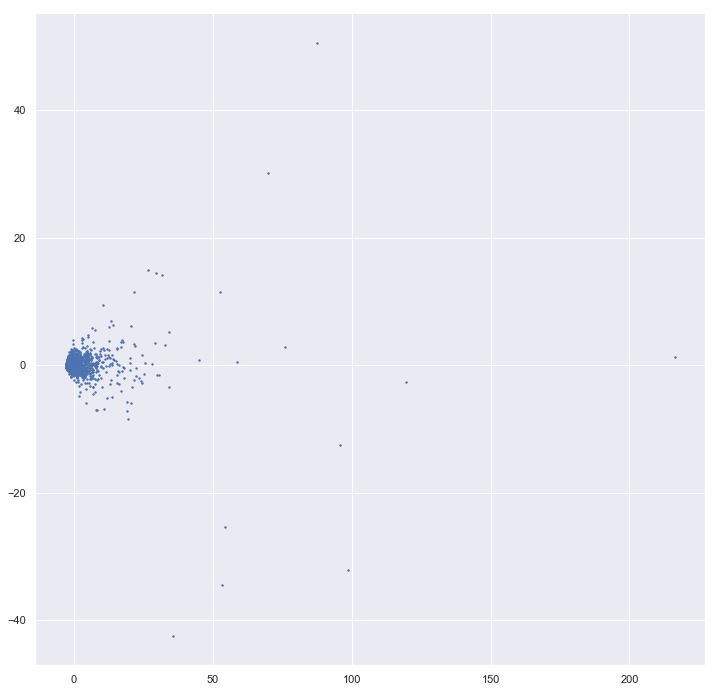

In [56]:
#seaborn plot
plt.figure(figsize =(12,12))
plt.scatter( PCA_transformating1.transformed_data[:,0], PCA_transformating1.transformed_data[:,1] , s =2)
plt.show()

In [57]:
import plotly.graph_objs as go

In [58]:
# Это для авторизации в plotly.
#  Нужно зарегестрироваться и получить свой ключ https://plot.ly/settings/api#/ 
# https://plot.ly/python/getting-started/#initialization-for-online-plotting
# создаете свой фаил и помещаете туда данные
f = open("api_key.txt", "r")
my_user_name = (f.readline().strip())
my_api_key = (f.readline().strip())
f.close()

In [59]:
import plotly 
plotly.tools.set_credentials_file(username=my_user_name, api_key=my_api_key)

In [60]:
# все данные
trace = go.Scatter(
    x = PCA_transformating1.transformed_data[:,0],
    y = PCA_transformating1.transformed_data[:,1],
    mode = 'markers',
    text= list(data.index)
)

plot_data = [trace]

py.iplot(plot_data, filename='basic-scatter')

C:\Users\Alex\Anaconda3\envs\Microsoft\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [45]:
# Подсветим интересующие нас фенотипы
# В этой функции определяется то, что мы ищем, например atherosclerosis

In [76]:
def indexes (data, pattern = 'atherosclerosis'): 
    z = pd.Series(data.index)
    interesting_data = z[  z.apply(lambda x: x.lower().find(pattern)>=0 ) ]
    interesting_index = interesting_data.index
    
    non_interesting_data = z[  z.apply(lambda x: x.lower().find(pattern) <0 ) ]
    non_interesting_index = non_interesting_data.index
    
    return interesting_data, interesting_index, non_interesting_data, non_interesting_index
    

In [77]:
interesting_data, interesting_index, non_interesting_data, non_interesting_index = indexes(data, pattern = 'atherosclerosis' )

In [86]:
interesting_data

459     pv_Carotid_atherosclerosis__CAD__in_HIV_infect...
623     pv_Coronary_artery_disesae__CAD___large_artery...
1317                      pv_Large_artery_atherosclerosis
dtype: object

In [85]:
# рисуем графики
trace_non_interesting = go.Scatter(
    x = PCA_transformating1.transformed_data[non_interesting_index,0],
    y = PCA_transformating1.transformed_data[non_interesting_index,1],
    mode = 'markers',
    text= list(non_interesting_data),
    marker = dict(color = 'blue',size = 1)
        
)


trace_interesting = go.Scatter(
    x = PCA_transformating1.transformed_data[interesting_index,0],
    y = PCA_transformating1.transformed_data[interesting_index,1],
    mode = 'markers',
    text= list(interesting_data),
    marker = dict(color = 'red')
        
)


# trace_non_interesting = go.Scatter(
#     x = PCA_transformating1.transformed_data[:,0],
#     y = PCA_transformating1.transformed_data[:,1],
#     mode = 'markers',
#     text= list(data.index)
# )

plot_data = [trace_interesting,trace_non_interesting]

py.iplot(plot_data, filename='basic-scatter')

C:\Users\Alex\Anaconda3\envs\Microsoft\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [108]:
tsne = TSNE(n_components =2, random_state =0)

In [109]:
tsne.fit_transform(PCA_transformating1.transformed_data)

array([[-1.7665733e+01,  2.1829645e+01],
       [ 5.9650700e+01, -2.9751940e+01],
       [-3.2767857e+01, -1.9186928e+01],
       ...,
       [ 3.7422957e+00, -8.1986866e+00],
       [ 3.9059238e+01,  7.9960553e-03],
       [-2.9054062e+00,  9.9406319e+00]], dtype=float32)

In [110]:
class TSNE_transformating():
    def __init__(self,data, n_components = 2 ):
        self.tsne = TSNE(n_components = n_components, random_state =0)
        self.transformed_data = self.tsne.fit_transform(data)
  
 

In [111]:
# Берем данные после PCA, иначе замучаемся ждать пока досчитается
TSNE_transformating1= TSNE_transformating(PCA_transformating1.transformed_data)

In [113]:
# рисуем графики
TSNE_trace_non_interesting = go.Scatter(
    x = TSNE_transformating1.transformed_data[non_interesting_index,0],
    y = TSNE_transformating1.transformed_data[non_interesting_index,1],
    mode = 'markers',
    text= list(non_interesting_data),
    marker = dict(color = 'blue',size = 1)
        
)


TSNE_trace_interesting = go.Scatter(
    x = TSNE_transformating1.transformed_data[interesting_index,0],
    y = TSNE_transformating1.transformed_data[interesting_index,1],
    mode = 'markers',
    text= list(interesting_data),
    marker = dict(color = 'red')
        
)


plot_data = [TSNE_trace_interesting,TSNE_trace_non_interesting]

py.iplot(plot_data, filename='basic-scatter')

C:\Users\Alex\Anaconda3\envs\Microsoft\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

